In [1]:
# Import required libraries.

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
# Select the relevent columns

cols = [
    'id',
    'host_id',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms_text'
]

data = pd.read_csv('./data/mining_data/listings.csv', usecols=cols)


In [3]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,6606,14942,5,Entire guesthouse,Entire home/apt,1,1 bath,1.0,1.0,$99.00,30,22,159,4.61
1,9419,30559,9,Private room in rental unit,Private room,2,3 shared baths,1.0,2.0,$55.00,2,28,175,4.70
2,9531,31481,2,Entire home,Entire home/apt,4,1 bath,2.0,3.0,$175.00,3,0,71,4.96
3,9534,31481,2,Entire guest suite,Entire home/apt,3,1 bath,2.0,2.0,$135.00,2,0,73,4.99
4,9596,14942,5,Entire rental unit,Entire home/apt,4,1 bath,1.0,4.0,$130.00,30,22,97,4.56


In [4]:
# Check for number of null entries in each columns.

data.isnull().sum()

id                         0
host_id                    0
host_listings_count        0
property_type              0
room_type                  0
accommodates               0
bathrooms_text             1
bedrooms                 702
beds                      70
price                      0
minimum_nights             0
availability_30            0
number_of_reviews          0
review_scores_rating    1087
dtype: int64

In [5]:
# Fixing the bathrooms_text column to make it usable in float type.

data['bathrooms'] = data['bathrooms_text'].astype(str).str[0]
data['bathrooms'].replace("H","0",inplace=True)
data['bathrooms'].replace("n","0",inplace=True)
data['bathrooms'].replace("S","0",inplace=True)
data['bathrooms'].replace("P","0",inplace=True)
data['bathrooms'] = data['bathrooms'].astype(str).astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6376 non-null   int64  
 1   host_id               6376 non-null   int64  
 2   host_listings_count   6376 non-null   int64  
 3   property_type         6376 non-null   object 
 4   room_type             6376 non-null   object 
 5   accommodates          6376 non-null   int64  
 6   bathrooms_text        6375 non-null   object 
 7   bedrooms              5674 non-null   float64
 8   beds                  6306 non-null   float64
 9   price                 6376 non-null   object 
 10  minimum_nights        6376 non-null   int64  
 11  availability_30       6376 non-null   int64  
 12  number_of_reviews     6376 non-null   int64  
 13  review_scores_rating  5289 non-null   float64
 14  bathrooms             6376 non-null   float64
dtypes: float64(4), int64(

In [7]:
# Dropping the original column

data.drop(['bathrooms_text'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6376 non-null   int64  
 1   host_id               6376 non-null   int64  
 2   host_listings_count   6376 non-null   int64  
 3   property_type         6376 non-null   object 
 4   room_type             6376 non-null   object 
 5   accommodates          6376 non-null   int64  
 6   bedrooms              5674 non-null   float64
 7   beds                  6306 non-null   float64
 8   price                 6376 non-null   object 
 9   minimum_nights        6376 non-null   int64  
 10  availability_30       6376 non-null   int64  
 11  number_of_reviews     6376 non-null   int64  
 12  review_scores_rating  5289 non-null   float64
 13  bathrooms             6376 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 697.5+ KB


In [9]:
# Checking for null values in columns.


data.isnull().sum()

id                         0
host_id                    0
host_listings_count        0
property_type              0
room_type                  0
accommodates               0
bedrooms                 702
beds                      70
price                      0
minimum_nights             0
availability_30            0
number_of_reviews          0
review_scores_rating    1087
bathrooms                  0
dtype: int64

In [10]:
# Drop entries which have null values in bedrooms type

data = data.dropna(how='any', subset=['bedrooms','beds'])

In [11]:
data.isnull().sum()

id                        0
host_id                   0
host_listings_count       0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
availability_30           0
number_of_reviews         0
review_scores_rating    954
bathrooms                 0
dtype: int64

In [12]:
# Removing string characters to convert price to float.

data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].astype(str).astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5652 entries, 0 to 6375
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5652 non-null   int64  
 1   host_id               5652 non-null   int64  
 2   host_listings_count   5652 non-null   int64  
 3   property_type         5652 non-null   object 
 4   room_type             5652 non-null   object 
 5   accommodates          5652 non-null   int64  
 6   bedrooms              5652 non-null   float64
 7   beds                  5652 non-null   float64
 8   price                 5652 non-null   float64
 9   minimum_nights        5652 non-null   int64  
 10  availability_30       5652 non-null   int64  
 11  number_of_reviews     5652 non-null   int64  
 12  review_scores_rating  4698 non-null   float64
 13  bathrooms             5652 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 662.3+ KB


In [14]:
print ('Number of missing review scores ratings:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 954


In [15]:
# Distribution of accomodates

print ('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print ('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodation 1: 221
Accommodation 2: 1760
Accommodation 3: 404
Accommodation 4: 1482
Accommodation 5: 331
Accommodation 6: 732
Accommodation 7: 107
Accommodation 8: 292
Accommodation 9: 43
Accommodation 10: 114
Accommodation 11: 28
Accommodation 12: 57
Accommodation 13: 7
Accommodation 14: 20
Accommodation 15: 8
Accommodation 16: 46


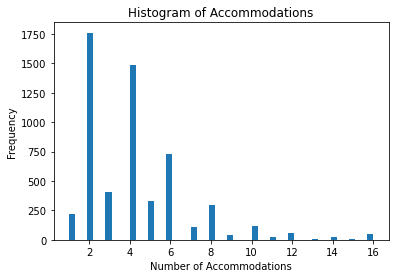

In [16]:
# Visualize distribution of accomodates
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Distribution of beds

print ('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print ('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 14. 15. 16.]
Beds 1: 2171
Beds 2: 1688
Beds 3: 957
Beds 4: 411
Beds 5: 201
Beds 6: 107
Beds 7: 53
Beds 8: 31
Beds 9: 15
Beds 10: 7
Beds 11: 1
Beds 12: 4
Beds 13: 0
Beds 14: 2
Beds 15: 2
Beds 16: 2


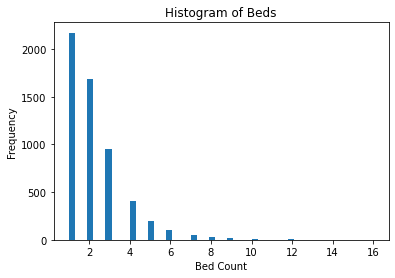

In [18]:
# Visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

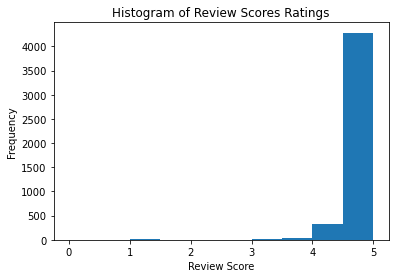

In [19]:
# Visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Making values of unavailable reviews as 0.

idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [21]:
# Creating buckets for the reviews

def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    
    elif val >= 4:
        return '4-5'

    elif val >= 3.0 and val < 4:
        return '3-4'

    elif val >= 2.0 and val < 3:
        return '2-3'
    
    elif val >= 1.0 and val < 2:
        return '1-2'
    
    elif val < 1.0:
        return '0-1'
    
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['0-1' '1-2' '2-3' '3-4' '4-5']


In [22]:
# No null data entry remains

data.isnull().sum()

id                      0
host_id                 0
host_listings_count     0
property_type           0
room_type               0
accommodates            0
bedrooms                0
beds                    0
price                   0
minimum_nights          0
availability_30         0
number_of_reviews       0
review_scores_rating    0
bathrooms               0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 6375
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4698 non-null   int64  
 1   host_id               4698 non-null   int64  
 2   host_listings_count   4698 non-null   int64  
 3   property_type         4698 non-null   object 
 4   room_type             4698 non-null   object 
 5   accommodates          4698 non-null   int64  
 6   bedrooms              4698 non-null   float64
 7   beds                  4698 non-null   float64
 8   price                 4698 non-null   float64
 9   minimum_nights        4698 non-null   int64  
 10  availability_30       4698 non-null   int64  
 11  number_of_reviews     4698 non-null   int64  
 12  review_scores_rating  4698 non-null   object 
 13  bathrooms             4698 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 550.5+ KB


In [24]:
# One hot encoding is done for the categorical data columns.

property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
ratings_scores_dummies = pd.get_dummies(data['review_scores_rating'])

# Replacing old columns

df = pd.concat((data.drop([ \
    'property_type', 'room_type', 'review_scores_rating'], axis=1), \
    property_dummies.astype(int), \
    room_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print ('Number of Columns:', len(df.columns))

# Price is placed as the last column

cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

Number of Columns: 69


In [25]:
# Normalizing the numerical data

def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listings_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])
    
df.head()

,id,host_id,host_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,bathrooms,...,Private room,Private room,Shared room,Shared room,0-1,1-2,2-3,3-4,4-5,price
0,6606,14942,-0.182589,-1.275696,-0.746723,-0.850856,1.435549,0.873473,0.867007,-0.570567,...,0,0,0,0,0,0,0,0,1,99.0
1,9419,30559,-0.175940,-0.890924,-0.746723,-0.195665,-0.506848,1.445454,1.024290,2.540892,...,0,1,0,0,0,0,0,0,1,55.0
2,9531,31481,-0.187575,-0.121378,0.197077,0.459527,-0.437476,-1.223788,0.001952,-0.570567,...,0,0,0,0,0,0,0,0,1,175.0
3,9534,31481,-0.187575,-0.506151,0.197077,-0.195665,-0.506848,-1.223788,0.021613,-0.570567,...,0,0,0,0,0,0,0,0,1,135.0
4,9596,14942,-0.182589,-0.121378,-0.746723,1.114718,1.435549,0.873473,0.257537,-0.570567,...,0,0,0,0,0,0,0,0,1,130.0


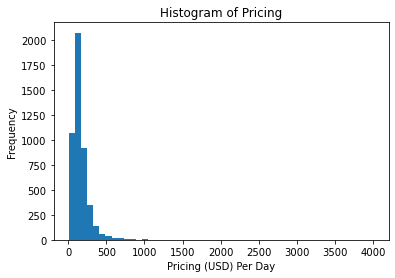

In [26]:
# Price distribution

plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Log transform is applied to the price to scale it

df['price_log'] = df['price'].apply(lambda x: math.log(x))

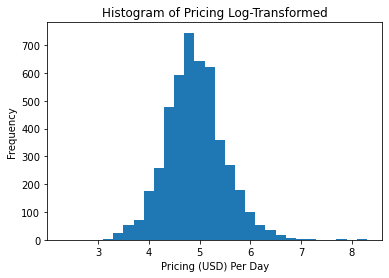

In [28]:
# Price distribution after log transform

plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

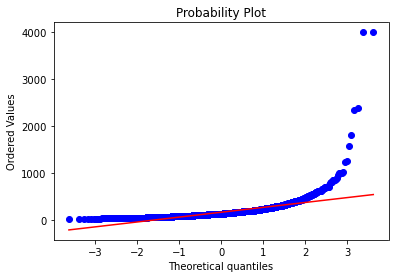

In [29]:
# QQ plot for prices

stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

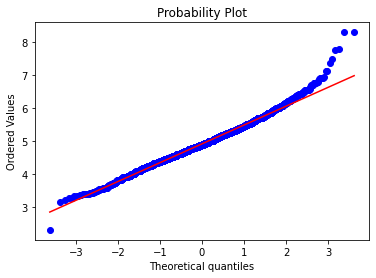

In [30]:
# QQ plot for log transformed prices

stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()

In [31]:
# Store the data in csv
df.to_csv('./data/mining_data/listings_clean.csv', index=False)